In [27]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Input

In [28]:
# Definir una serie de datos
serieP = np.array([10, 25, 23, 14, 25, 23, 15, 85, 14, 36])
print(serieP)

[10 25 23 14 25 23 15 85 14 36]


In [99]:
def descomponer_serie(serie, longitud):
    """
    Descomponer una serie en un conjunto de características (X) y un objetivo
    (y)

    Parameters:
    serie (np.ndarray): La serie de datos a descomponer.
    longitud (int): La longitud de la secuencia de entrada.

    Returns:
    tuple: El vector de características (X) y el vector de objetivos (y).
    """
    X = np.array(
        [serie[i:i + longitud] for i in range(len(serie) - longitud)],
        dtype=np.float32)
    y = serie[longitud:].astype(np.float32)
    return X, y

In [100]:
# Descomponer serieP y mostrar resultados
X, y = descomponer_serie(serieP, 5)
print("Características y objetivos de serieP:")
for x_i, y_i in zip(X, y):
    print(x_i, y_i)

Características y objetivos de serieP:
[10. 25. 23. 14. 25.] 23.0
[25. 23. 14. 25. 23.] 15.0
[23. 14. 25. 23. 15.] 85.0
[14. 25. 23. 15. 85.] 14.0
[25. 23. 15. 85. 14.] 36.0


In [101]:
# Leer y preparar la base de datos
PP = pd.read_csv('../PrecioPetroleoDEF.csv', sep=';')
PP['Fecha'] = pd.to_datetime(PP['Fecha'], format='%d/%m/%Y')
print(PP.head())

       Fecha  Mezcla_Mexicana
0 2005-01-03            31.42
1 2005-01-04            32.77
2 2005-01-05            32.64
3 2005-01-06            33.95
4 2005-01-07            34.15


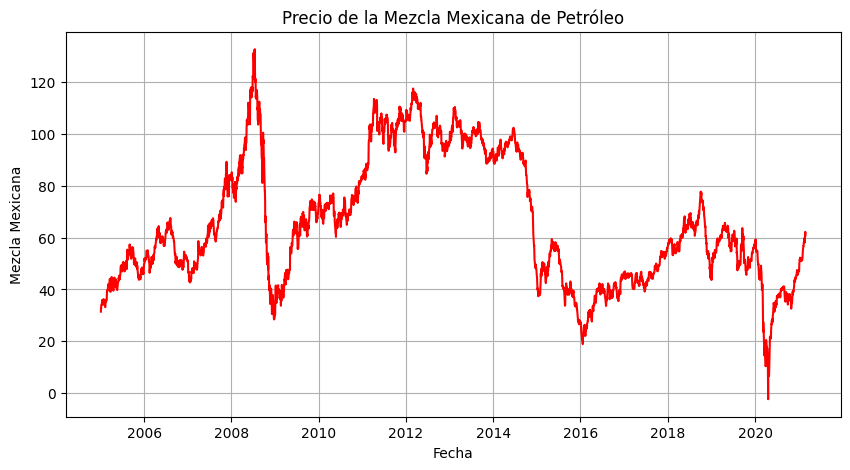

In [102]:
# Graficar la serie temporal
plt.figure(figsize=(10, 5))
plt.plot(PP['Fecha'], PP['Mezcla_Mexicana'], color='red')
plt.xlabel('Fecha')
plt.ylabel('Mezcla Mexicana')
plt.title('Precio de la Mezcla Mexicana de Petróleo')
plt.grid()
plt.show()

In [103]:
# Crear secuencia de precios
SecuenciaPrecios = PP["Mezcla_Mexicana"].to_numpy()
X_sec, y_sec = descomponer_serie(SecuenciaPrecios, 5)
print("Características y objetivos para la serie de precios:")
for x_i, y_i in zip(X_sec, y_sec):
    print(x_i, y_i)

Características y objetivos para la serie de precios:
[31.42 32.77 32.64 33.95 34.15] 34.35
[32.77 32.64 33.95 34.15 34.35] 34.6
[32.64 33.95 34.15 34.35 34.6 ] 34.75
[33.95 34.15 34.35 34.6  34.75] 35.69
[34.15 34.35 34.6  34.75 35.69] 35.99
[34.35 34.6  34.75 35.69 35.99] 35.95
[34.6  34.75 35.69 35.99 35.95] 35.85
[34.75 35.69 35.99 35.95 35.85] 34.62
[35.69 35.99 35.95 35.85 34.62] 34.08
[35.99 35.95 35.85 34.62 34.08] 35.34
[35.95 35.85 34.62 34.08 35.34] 35.75
[35.85 34.62 34.08 35.34 35.75] 36.21
[34.62 34.08 35.34 35.75 36.21] 36.26
[34.08 35.34 35.75 36.21 36.26] 36.14
[35.34 35.75 36.21 36.26 36.14] 35.05
[35.75 36.21 36.26 36.14 35.05] 35.39
[36.21 36.26 36.14 35.05 35.39] 35.09
[36.26 36.14 35.05 35.39 35.09] 34.38
[36.14 35.05 35.39 35.09 34.38] 34.24
[35.05 35.39 35.09 34.38 34.24] 34.55
[35.39 35.09 34.38 34.24 34.55] 33.34
[35.09 34.38 34.24 34.55 33.34] 33.17
[34.38 34.24 34.55 33.34 33.17] 33.17
[34.24 34.55 33.34 33.17 33.17] 34.41
[34.55 33.34 33.17 33.17 34.41] 34.

In [104]:
# Longitud de X
print("Longitud de X:", len(X_sec))

Longitud de X: 4092


In [105]:
# Definir el modelo
model = Sequential([
    Input(shape=(5,)),
    Dense(5, activation='relu'),
    Dense(1, activation='relu')
])

In [106]:
# Compilar el modelo
model.compile(
    loss='mean_absolute_error',
    optimizer='adam',
    metrics=['accuracy', 'mae'])

In [107]:
# Entrenar el modelo
model.fit(X_sec, y_sec, epochs=10, batch_size=10)

Epoch 1/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 1s 458us/step - accuracy: 0.0000e+00 - loss: 5.4742 - mae: 5.4742
Epoch 2/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.0000e+00 - loss: 1.2287 - mae: 1.2287
Epoch 3/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.0000e+00 - loss: 1.1818 - mae: 1.1818
Epoch 4/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.0000e+00 - loss: 1.1628 - mae: 1.1628
Epoch 5/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.0000e+00 - loss: 1.1402 - mae: 1.1402
Epoch 6/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.0000e+00 - loss: 1.1076 - mae: 1.1076
Epoch 7/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.0000e+00 - loss: 1.1189 - mae: 1.1189
Epoch 8/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.0000e+00 - loss: 1.1419 - mae: 1.1419
Epoch 9/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.0000e+00 - loss: 1.1062 - mae: 1.1062
Epoch 10/10
410/410 ━━━━━━━━━━━━━━━━━━━━ 0s 43

In [108]:
# Generar predicciones
predictions = model.predict(X_sec).flatten()
RealPredictions = pd.DataFrame({
    "Predictions": predictions,
    "Real": y_sec
})
print(RealPredictions)

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step
      Predictions       Real
0       34.306450  34.349998
1       34.066830  34.599998
2       34.332890  34.750000
3       34.729046  35.689999
4       35.694141  35.990002
...           ...        ...
4087    57.250732  60.099998
4088    59.691475  60.529999
4089    61.573078  61.849998
4090    61.702427  62.230000
4091    62.005020  60.889999

[4092 rows x 2 columns]


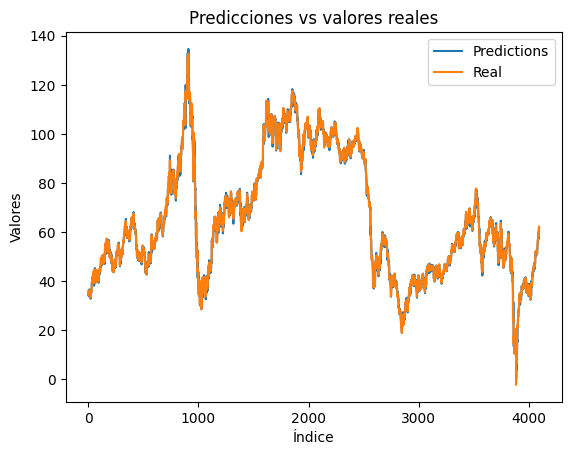

In [110]:
# Graficar predicciones vs valores reales
RealPredictions.plot(
    y=['Predictions', 'Real'],
    title="Predicciones vs valores reales")
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.show()

In [111]:
# Demostrar predicción
x_input = np.array([70, 80, 90, 75, 67]).reshape((1, 5))
yhat = model.predict(x_input)
print("Predicción para la entrada:", yhat.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicción para la entrada: [56.557613]
